<a href="https://colab.research.google.com/github/IdealisticINTJ/ubiquitous-broccoli/blob/main/Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
# Check the type of 'data'
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'Data' (the attribute) means the input data
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
# This lets us simulate how our model will perform in the 'future'
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Building the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, we can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Training the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluating the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 45ms/step - loss: 1.2696 - accuracy: 0.2738 - val_loss: 1.1735 - val_accuracy: 0.2713
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1084 - accuracy: 0.3338 - val_loss: 1.0671 - val_accuracy: 0.3245
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0369 - accuracy: 0.3516 - val_loss: 0.9682 - val_accuracy: 0.3457
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9314 - accuracy: 0.4213 - val_loss: 0.8805 - val_accuracy: 0.4096
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8372 - accuracy: 0.4717 - val_loss: 0.8022 - val_accuracy: 0.4947
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7789 - accuracy: 0.5042 - val_loss: 0.7334 - val_accuracy: 0.5585
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7239 - accuracy: 0.5929 - val_loss: 0.6756 - val_accuracy: 0.6330
Epoch 8/100


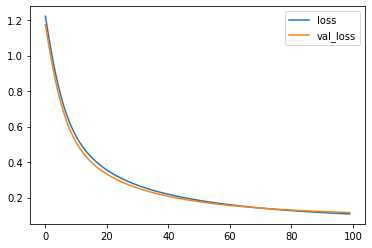

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

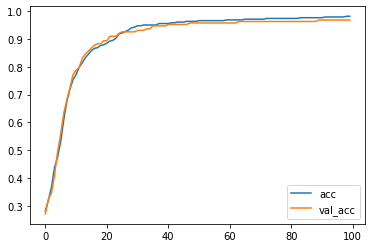

In [15]:
# Plotting the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Making predictions
P = model.predict(X_test)
print(P) # Here, What we get are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.53187823e-01]
 [9.86652613e-01]
 [8.58699083e-02]
 [9.84763682e-01]
 [3.00875604e-02]
 [2.56917477e-02]
 [7.28461802e-01]
 [4.98047352e-01]
 [9.43441451e-01]
 [2.45309472e-02]
 [6.00641433e-05]
 [5.38811088e-03]
 [9.93696928e-01]
 [9.14688945e-01]
 [9.94160414e-01]
 [9.88891482e-01]
 [9.98871207e-01]
 [3.69161367e-04]
 [4.93405759e-01]
 [2.73346901e-04]
 [5.22974074e-01]
 [3.51804793e-01]
 [9.92235661e-01]
 [1.10685825e-03]
 [9.83672261e-01]
 [6.09129667e-04]
 [9.61722732e-01]
 [1.89148188e-02]
 [8.94082844e-01]
 [1.45348340e-01]
 [1.94588751e-01]
 [1.11657977e-02]
 [2.24618435e-01]
 [1.10876858e-02]
 [9.97832656e-01]
 [9.93163228e-01]
 [2.76329517e-01]
 [9.76685524e-01]
 [9.62359428e-01]
 [9.92346048e-01]
 [9.80777204e-01]
 [9.68241692e-03]
 [9.98133302e-01]
 [2.42975354e-03]
 [8.81082058e-01]
 [9.90820765e-01]
 [9.65579629e-01]
 [9.65661526e-01]
 [9.22176123e-01]
 [9.34541702e-01]
 [9.75659013e-01]
 [7.81883864e-05]
 [5.81830740e-04]
 [3.60629380e-01]
 [1.01509064e-01]
 [6.685268

In [18]:
# Rounding to get the actual predictions
# Note: We have to flatten since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]


In [19]:
# Calculate the accuracy, and then compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9681
Evaluate output: [0.11527249962091446, 0.9680851101875305]


In [20]:
# Let's now save our model to a file
model.save('Linear_Classifier.h5')

In [21]:
# Checking if that model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K May 19 21:06 Linear_Classifier.h5
drwxr-xr-x 1 root root 4.0K May  6 13:44 sample_data


In [22]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
model = tf.keras.models.load_model('Linear_Classifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9681


[0.11527249962091446, 0.9680851101875305]

In [23]:
# Download the file 
from google.colab import files
files.download('Linear_Classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>